In [1]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from IPython.display import display, HTML

%matplotlib inline

/home/stelzer-monar/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
data = pd.read_csv("../data/raw/hans_2001.csv")
data.head()

,Unnamed: 0,TP_NOT,ID_AGRAVO,DT_NOTIFIC,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,...,CLASSATUAL,AVAL_ATU_N,ESQ_ATU_N,DOSE_RECEB,EPIS_RACIO,DTMUDESQ,CONTEXAM,DTALTA_N,TPALTA_N,IN_VINCULA
0,1,2,A309,2001-01-10,2001,41,410304,1359.0,2741474.0,2000-12-10,...,2.0,0.0,3.0,NaN,NaN,NaN,0.0,2002-10-02,1.0,0.0
1,2,2,A309,2001-01-17,2001,41,410940,1359.0,2741369.0,2000-12-23,...,2.0,0.0,3.0,NaN,NaN,NaN,2.0,2001-12-19,1.0,0.0
2,3,2,A309,2001-01-16,2001,41,410940,1359.0,2741369.0,2001-01-16,...,1.0,0.0,1.0,NaN,NaN,NaN,1.0,2001-06-27,1.0,0.0
3,4,2,A309,2001-01-08,2001,41,411780,1359.0,2743116.0,2001-01-08,...,2.0,0.0,3.0,NaN,NaN,NaN,3.0,2002-01-28,1.0,0.0
4,5,2,A309,2001-01-02,2001,41,411780,1359.0,2743116.0,2000-01-11,...,2.0,2.0,3.0,NaN,NaN,NaN,0.0,2002-03-14,1.0,0.0


TPALTA_N = 7

ID_MUNI_AT

In [3]:
gp_muni_at = data.groupby("ID_MUNI_AT", group_keys=False)
count_ab = gp_muni_at['TPALTA_N'].apply(lambda x: (x==7).sum())
count = gp_muni_at['TPALTA_N'].count()
count_df = pd.DataFrame({"altas" : count.values, "abandonos" : count_ab.values, "muni" : count.index})
count_df["percent_ab"] = count_df["abandonos"] / count_df["altas"]
count_df


,altas,abandonos,muni,percent_ab
0,14,1,110001.0,0.071429
1,217,7,110002.0,0.032258
2,2,0,110003.0,0.000000
3,112,4,110004.0,0.035714
4,16,4,110005.0,0.250000
...,...,...,...,...
2706,6,0,522157.0,0.000000
2707,35,4,522160.0,0.114286
2708,1,0,522170.0,0.000000
2709,14,0,522205.0,0.000000


In [43]:
geo = geopandas.read_file("../data/../data/processed/geo/all_cities.shp")
geo["muni"] = geo["code_muni"].astype("string").str.slice(stop=-3).astype("float64")
geo

/home/stelzer-monar/.local/lib/python3.10/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_muni,name_muni,code_state,abbrev_sta,geometry,muni
0,1200013.0,Acrelândia,12.0,AC,"POLYGON ((-67.14117 -9.68337, -67.13885 -9.683...",120001.0
1,1200054.0,Assis Brasil,12.0,AC,"POLYGON ((-69.79978 -10.50668, -69.80064 -10.4...",120005.0
2,1200104.0,Brasiléia,12.0,AC,"POLYGON ((-69.58835 -10.64308, -69.55123 -10.6...",120010.0
3,1200138.0,Bujari,12.0,AC,"POLYGON ((-68.31643 -9.29541, -68.31024 -9.290...",120013.0
4,1200179.0,Capixaba,12.0,AC,"POLYGON ((-67.84667 -10.28750, -67.84233 -10.2...",120017.0
...,...,...,...,...,...,...
5562,1721208.0,Tocantinópolis,17.0,TO,"POLYGON ((-47.72213 -6.18310, -47.71379 -6.182...",172120.0
5563,1721257.0,Tupirama,17.0,TO,"POLYGON ((-48.29902 -9.14051, -48.30093 -9.139...",172125.0
5564,1721307.0,Tupiratins,17.0,TO,"POLYGON ((-48.10116 -8.40065, -48.09494 -8.407...",172130.0
5565,1722081.0,Wanderlândia,17.0,TO,"POLYGON ((-48.12988 -7.03226, -48.12996 -6.999...",172208.0


In [44]:
map_data= geo.merge(count_df, how="left", left_on="muni", right_on="muni")
map_data

,code_muni,name_muni,code_state,abbrev_sta,geometry,muni,altas,abandonos,percent_ab
0,1200013.0,Acrelândia,12.0,AC,"POLYGON ((-67.14117 -9.68337, -67.13885 -9.683...",120001.0,NaN,NaN,NaN
1,1200054.0,Assis Brasil,12.0,AC,"POLYGON ((-69.79978 -10.50668, -69.80064 -10.4...",120005.0,1.0,0.0,0.0
2,1200104.0,Brasiléia,12.0,AC,"POLYGON ((-69.58835 -10.64308, -69.55123 -10.6...",120010.0,6.0,0.0,0.0
3,1200138.0,Bujari,12.0,AC,"POLYGON ((-68.31643 -9.29541, -68.31024 -9.290...",120013.0,NaN,NaN,NaN
4,1200179.0,Capixaba,12.0,AC,"POLYGON ((-67.84667 -10.28750, -67.84233 -10.2...",120017.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5562,1721208.0,Tocantinópolis,17.0,TO,"POLYGON ((-47.72213 -6.18310, -47.71379 -6.182...",172120.0,11.0,0.0,0.0
5563,1721257.0,Tupirama,17.0,TO,"POLYGON ((-48.29902 -9.14051, -48.30093 -9.139...",172125.0,3.0,0.0,0.0
5564,1721307.0,Tupiratins,17.0,TO,"POLYGON ((-48.10116 -8.40065, -48.09494 -8.407...",172130.0,NaN,NaN,NaN
5565,1722081.0,Wanderlândia,17.0,TO,"POLYGON ((-48.12988 -7.03226, -48.12996 -6.999...",172208.0,3.0,0.0,0.0


/home/stelzer-monar/.local/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/stelzer-monar/.local/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/stelzer-monar/.local/lib/python3.10/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/stelzer-monar/.local/lib/python3.10/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be re

(-76.24816773213895,
 -26.578376943044017,
 -35.70327738798797,
 7.223037194637598)

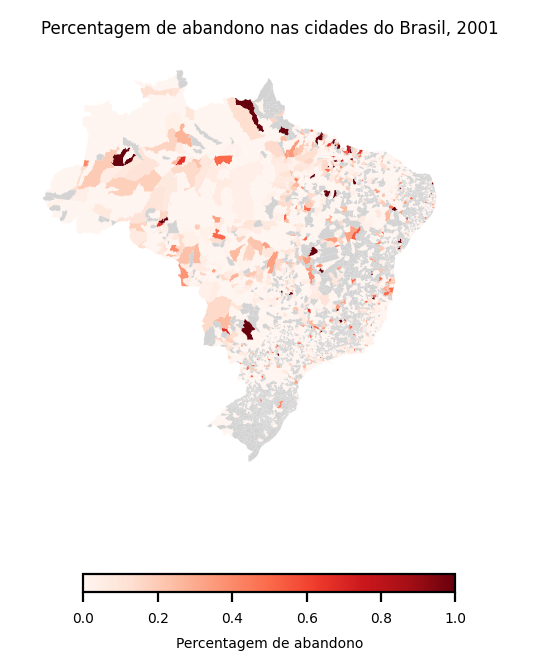

In [45]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

map_data.plot(
    column="percent_ab",
    cmap="Reds",
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    legend_kwds={
        "label": "Percentagem de abandono",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
)

ax.set_title("Percentagem de abandono nas cidades do Brasil, 2001")
ax.axis("off")
